In [52]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import sys
import math

from datetime import datetime
from datetime import timedelta
import datetime

from scipy import spatial
from numpy import array
from numpy import corrcoef
from scipy.spatial import distance

from sklearn.preprocessing import MinMaxScaler

def dist_euclidian(v1,v2):
    return distance.euclidean(v1, v2)

def measure_cossine(v1,v2):
    return (1 - spatial.distance.cosine(v1, v2))

def measure_correlation(v1,v2):
    return corrcoef(v1,v2)[0,1]

def dist_correlation(dc):
    return math.sqrt(2 *(1 - dc))

def measure_angle(arcc):
    return math.degrees(np.arccos(arcc))

def measure(v1,v2):
    #return measure_correlation(v1,v2)
    return measure_correlation(v1,v2)

In [53]:
df = pd.DataFrame()
path = (os.path.abspath(".")) + "/../../../ds/supertrunfo/datasete/"
filename = "s2.csv"
file = path + str(filename)
df = pd.read_csv(file, delimiter=";", dtype={
    'nome': str, 'cil': float, 'pot':float, 'v':float, 'p':float,
    'comp':float
   })


In [54]:
df.head(10)

,nome,cil,pot,v,p,comp
0,maserati_asseto_corsa,3217.0,369.0,280.0,1590.0,4.51
1,jaguar,3996.0,363.0,250.0,1715.0,4.76
2,porsche_911_gt2,3600.0,462.0,315.0,1451.0,4.45
3,aston_martin_vanquish,5935.0,460.0,306.0,1863.0,4.67
4,rolls_royce_park_ward,5379.0,326.0,225.0,2480.0,5.65
5,mercedes_s_63_amg,6258.0,444.0,250.0,2035.0,5.16
6,daimler_super_v8,3996.0,363.0,250.0,1820.0,5.15
7,bentley_continentaal_t,6750.0,426.0,270.0,2450.0,5.22
8,lenux_rx_300,2995.0,201.0,180.0,1865.0,4.58
9,mercedes_ml_55_amg,5439.0,347.0,235.0,2300.0,4.64


In [55]:
df.columns

Index(['nome', 'cil', 'pot', 'v', 'p', 'comp'], dtype='object')

In [56]:
df.describe()

,cil,pot,v,p,comp
count,32.000000,32.000000,32.000000,32.000000,32.000000
mean,5054.750000,430.531250,272.375000,1811.687500,4.905313
std,1244.591318,203.465458,56.135062,516.639791,0.569488
min,2995.000000,201.000000,180.000000,162.000000,4.090000
25%,4193.000000,325.750000,238.750000,1487.750000,4.465000
50%,4972.000000,374.500000,250.000000,1846.500000,4.735000
75%,5988.000000,460.500000,307.000000,2132.500000,5.175000
max,7993.000000,1200.000000,404.000000,2870.000000,6.400000


In [57]:
columns = ['nome']
df.drop(columns, inplace=True, axis=1)
df.head(50)

,cil,pot,v,p,comp
0,3217.0,369.0,280.0,1590.0,4.51
1,3996.0,363.0,250.0,1715.0,4.76
2,3600.0,462.0,315.0,1451.0,4.45
3,5935.0,460.0,306.0,1863.0,4.67
4,5379.0,326.0,225.0,2480.0,5.65
5,6258.0,444.0,250.0,2035.0,5.16
6,3996.0,363.0,250.0,1820.0,5.15
7,6750.0,426.0,270.0,2450.0,5.22
8,2995.0,201.0,180.0,1865.0,4.58
9,5439.0,347.0,235.0,2300.0,4.64


In [58]:
df.describe()

,cil,pot,v,p,comp
count,32.000000,32.000000,32.000000,32.000000,32.000000
mean,5054.750000,430.531250,272.375000,1811.687500,4.905313
std,1244.591318,203.465458,56.135062,516.639791,0.569488
min,2995.000000,201.000000,180.000000,162.000000,4.090000
25%,4193.000000,325.750000,238.750000,1487.750000,4.465000
50%,4972.000000,374.500000,250.000000,1846.500000,4.735000
75%,5988.000000,460.500000,307.000000,2132.500000,5.175000
max,7993.000000,1200.000000,404.000000,2870.000000,6.400000


In [59]:
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df) 
df.loc[:,:] = scaled_values

In [60]:
df

,cil,pot,v,p,comp
0,0.044418,0.168168,0.446429,0.527326,0.181818
1,0.200280,0.162162,0.312500,0.573486,0.290043
2,0.121048,0.261261,0.602679,0.475997,0.155844
3,0.588235,0.259259,0.562500,0.628139,0.251082
4,0.476991,0.125125,0.200893,0.855982,0.675325
5,0.652861,0.243243,0.312500,0.691654,0.463203
6,0.200280,0.162162,0.312500,0.612260,0.458874
7,0.751301,0.225225,0.401786,0.844904,0.489177
8,0.000000,0.000000,0.000000,0.628877,0.212121
9,0.488996,0.146146,0.245536,0.789513,0.238095


           cil       pot         v         p      comp
cil   1.000000  0.459262  0.327557  0.048645  0.135153
pot   0.459262  1.000000  0.847328 -0.389394 -0.358970
v     0.327557  0.847328  1.000000 -0.646588 -0.570671
p     0.048645 -0.389394 -0.646588  1.000000  0.762486
comp  0.135153 -0.358970 -0.570671  0.762486  1.000000


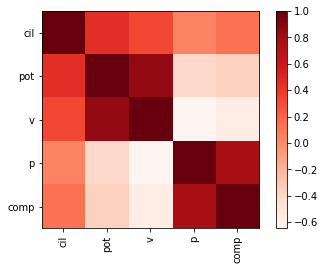

In [61]:
print(df.corr())
plt.imshow(df.corr(), cmap=plt.cm.Reds, interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(df.columns))]
plt.xticks(tick_marks, df.columns, rotation='vertical')
plt.yticks(tick_marks, df.columns)
plt.show()

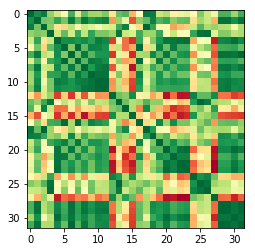

In [62]:
plt.imshow(df.T.corr(), cmap=plt.cm.RdYlGn)
plt.savefig('dataset2.pdf')
plt.show()

In [63]:
matriz_cor = df.T.corr()
print(matriz_cor)
dfm = pd.DataFrame(matriz_cor)
filename = "s2_matrix_corr_pearson2.csv"
dfm.to_csv(path+filename)



          0         1         2         3         4         5         6   \
0   1.000000  0.836481  0.912440  0.468881  0.266986  0.071633  0.683430   
1   0.836481  1.000000  0.562824  0.535386  0.738674  0.558231  0.922306   
2   0.912440  0.562824  1.000000  0.487012 -0.118729 -0.192026  0.341483   
3   0.468881  0.535386  0.487012  1.000000  0.279640  0.615835  0.258217   
4   0.266986  0.738674 -0.118729  0.279640  1.000000  0.836110  0.853824   
5   0.071633  0.558231 -0.192026  0.615835  0.836110  1.000000  0.527126   
6   0.683430  0.922306  0.341483  0.258217  0.853824  0.527126  1.000000   
7   0.206962  0.637758 -0.031841  0.728002  0.809659  0.985820  0.563750   
8   0.628089  0.927962  0.264893  0.310018  0.854318  0.622665  0.923050   
9   0.438592  0.791411  0.189085  0.748074  0.763717  0.893450  0.638590   
10  0.431047  0.846688  0.091326  0.541034  0.916536  0.885917  0.804169   
11  0.525445  0.890781  0.194781  0.544390  0.869714  0.820246  0.816934   
12 -0.123325